<a href="https://colab.research.google.com/github/MarioSolano98/actividad-evaluativa3-AC/blob/main/actividad_evaluativa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto 4

## Importar Librerias

In [1]:
# Clonar el repositorio
!git clone https://github.com/MarioSolano98/actividad-evaluativa3-AC.git

Cloning into 'actividad-evaluativa3-AC'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 10.31 MiB | 8.69 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
# Importar librerías esenciales
import pandas as pd            # Para manipulación y análisis de datos
import numpy as np             # Para operaciones numéricas y manejo de arrays
import matplotlib.pyplot as plt # Para visualización de gráficos
import seaborn as sns          # Para gráficos estadísticos y de exploración de datos
from sklearn.model_selection import train_test_split # Para dividir datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # Modelo Logit básico
from sklearn.linear_model import RidgeClassifier, Lasso, ElasticNet # Modelos logísticos penalizados
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score # Para evaluar modelos
from sklearn.preprocessing import StandardScaler    # Para normalizar datos
from sklearn.model_selection import GridSearchCV    # Para optimizar hiperparámetros

## Análisis exploratorio

In [3]:
# Cargar el archivo de datos
data_path = '/content/actividad-evaluativa3-AC/Dengue_Data.xlsx'
data = pd.read_excel(data_path)

# Visualizar las primeras filas
data.head()

,edad_,Grupos edad,sexo_,area_,area_.1,area_.2,ocupacion_,per_etn_,gp_discapa,gp_desplaz,...,hipotermia,caida_plaq,acum_liqui,aum_hemato,extravasac,hemorr_hem,choque,daño_organ,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA


In [4]:
# Información general del DataFrame
print("Información general del dataset:")
data.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edad_                          50397 non-null  int64         
 1   Grupos edad                    50397 non-null  object        
 2   sexo_                          50397 non-null  object        
 3   area_                          50397 non-null  object        
 4   area_.1                        50397 non-null  object        
 5   area_.2                        50397 non-null  object        
 6   ocupacion_                     50397 non-null  object        
 7   per_etn_                       50397 non-null  object        
 8   gp_discapa                     49661 non-null  object        
 9   gp_desplaz                     49676 non-null  object        
 10  gp_migrant                     49696 non-null  ob

In [5]:
# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
data.describe()



Estadísticas descriptivas:


,edad_,fec_con_,ini_sin_,tpo_consulta(consulta-inicio),fec_hos_,tpo_deterioro(hosp-consul)
count,50397.000000,50386,50384,50384.000000,14960,14959.000000
mean,29.609858,2017-01-25 06:06:35.252649728,2017-01-20 20:32:11.470307840,4.410349,2017-03-31 07:13:03.529411584,5.136841
min,1.000000,2015-01-04 00:00:00,2014-12-30 00:00:00,0.000000,2015-01-04 00:00:00,0.000000
25%,14.000000,2016-04-05 00:00:00,2016-04-01 00:00:00,2.000000,2016-03-23 00:00:00,3.000000
50%,26.000000,2016-08-01 00:00:00,2016-07-27 00:00:00,4.000000,2016-08-09 00:00:00,4.000000
75%,42.000000,2017-07-19 00:00:00,2017-07-15 00:00:00,5.000000,2018-08-06 00:00:00,6.000000
max,131.000000,2021-02-09 00:00:00,2021-01-02 00:00:00,374.000000,2021-01-11 00:00:00,373.000000
std,19.029978,NaN,NaN,9.448480,NaN,11.527729


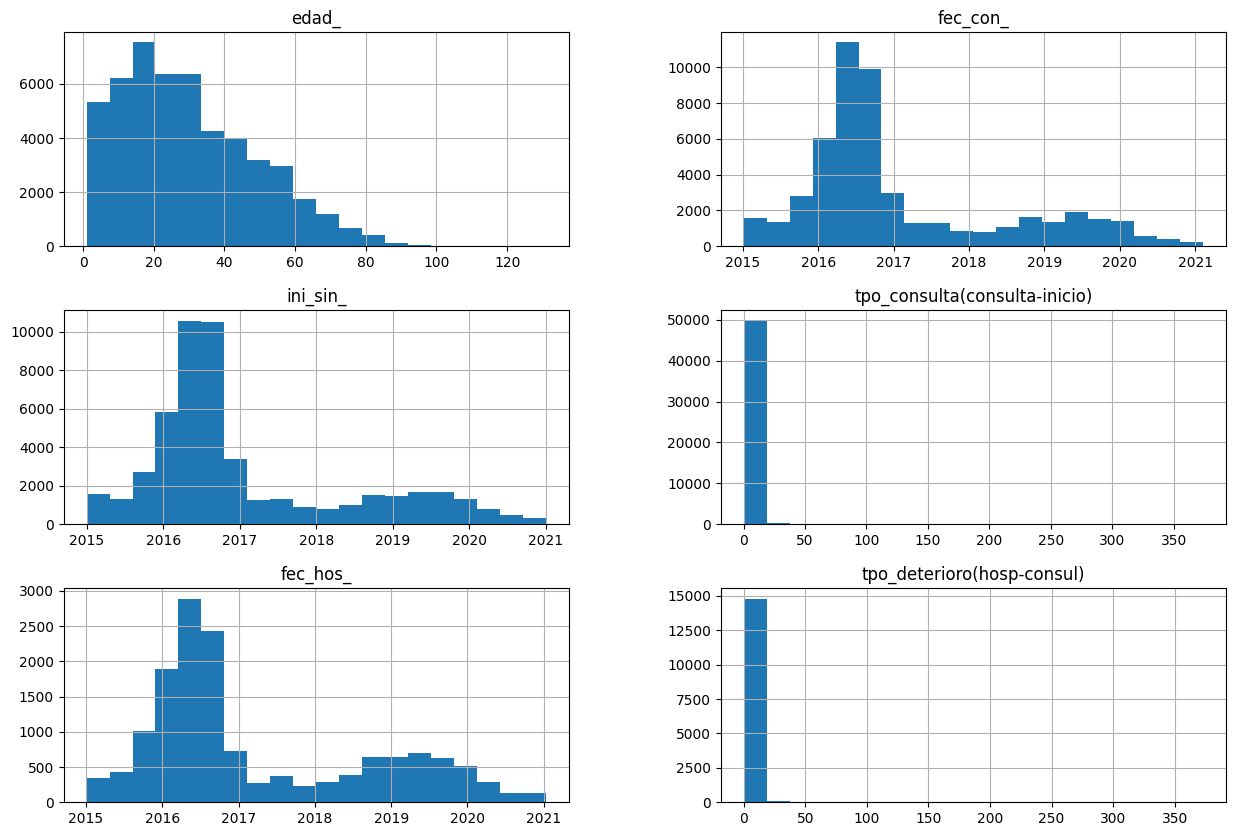

In [6]:
# Visualización de histogramas para variables numéricas
data.hist(bins=20, figsize=(15, 10))
plt.show()

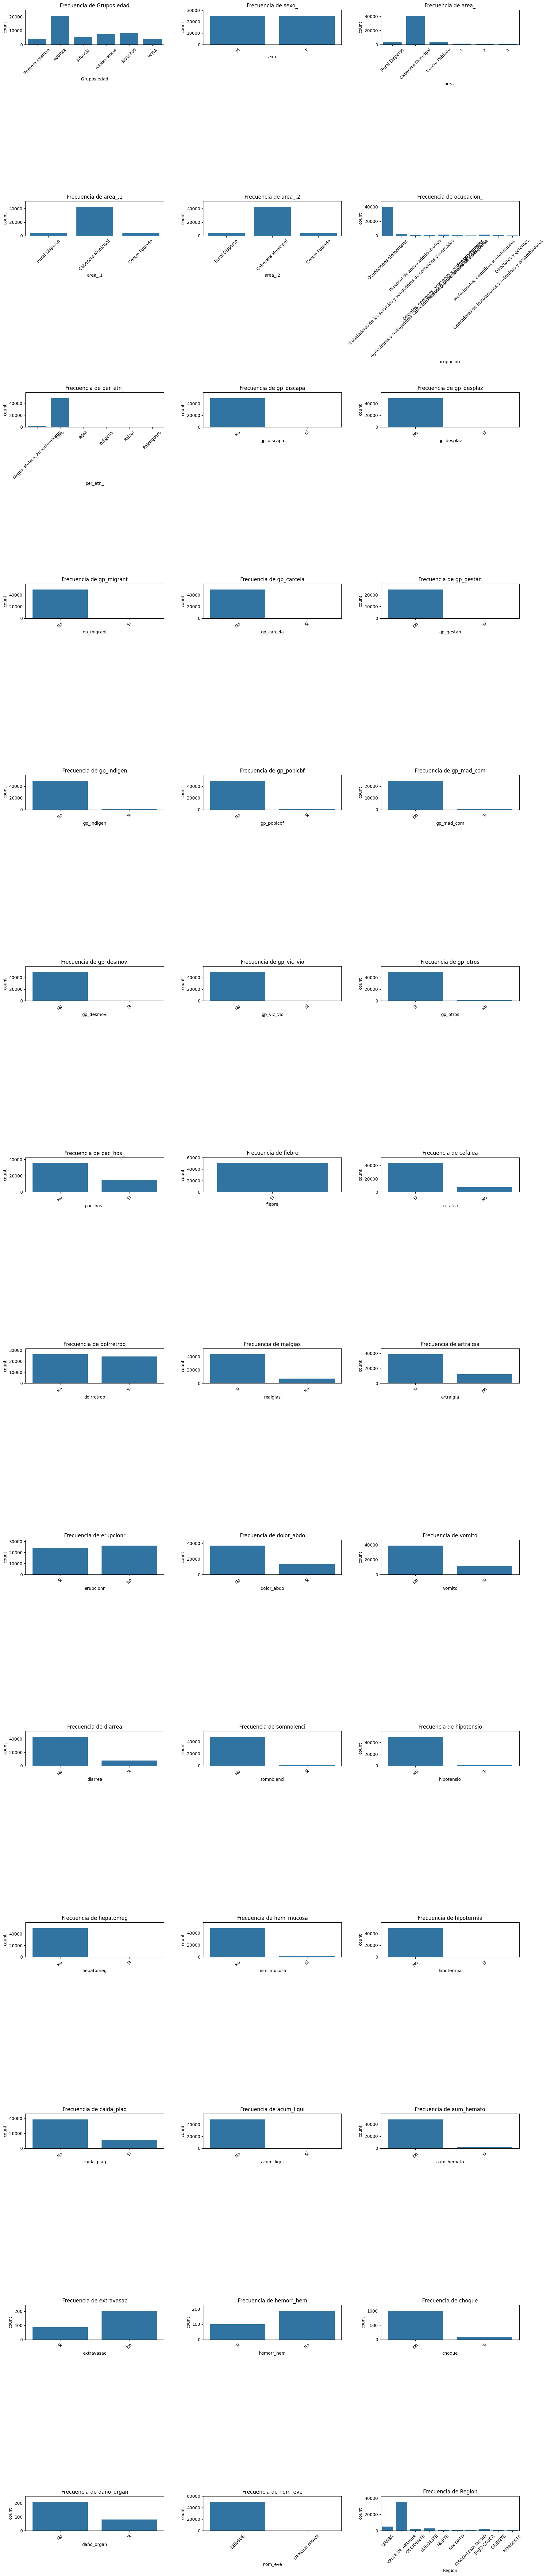

In [11]:
# Visualización de histogramas para variables categoricas

# Selección de las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Configuración de subplots en grupos de tres
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6 * n_rows))

# Aplanar los ejes en una sola lista para iterar fácilmente
axes = axes.flatten()

# Crear gráficos de barras para cada variable categórica
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Frecuencia de {col}')
    axes[i].tick_params(axis='x', rotation=45)
    # Ajuste del límite superior de ylim para que se vea más espaciado
    max_count = data[col].value_counts().max()
    axes[i].set_ylim(0, max_count * 1.2)  # Ajuste del límite superior al 120% del valor máximo

# Ocultar cualquier gráfico adicional en el subplot si hay un número impar de gráficos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajuste del espaciado para evitar superposiciones
plt.tight_layout(h_pad=5)  # h_pad controla el espacio vertical entre gráficos
plt.show()

Columnas con más del 50% de valores nulos: ['gp_gestan', 'gp_mad_com', 'fec_hos_', 'tpo_deterioro(hosp-consul)', 'extravasac', 'hemorr_hem', 'choque', 'daño_organ']


<ipython-input-12-37270eb7a624>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


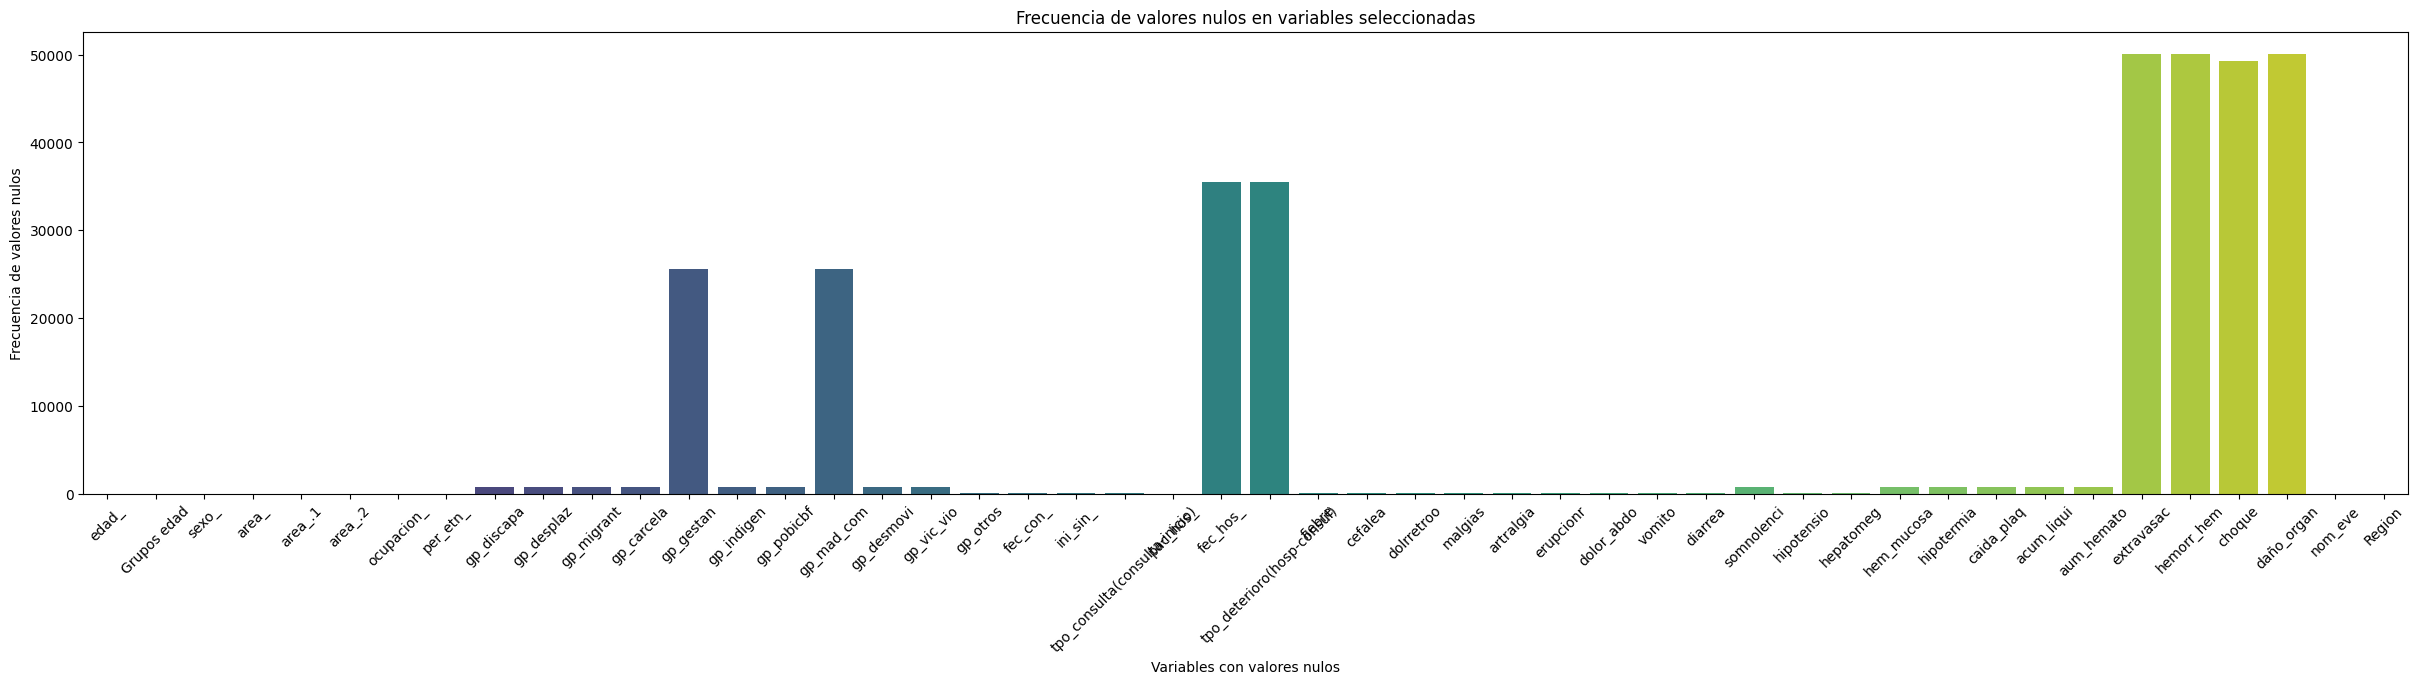

In [12]:
#Identificación de las columnas con datos Nulos

# Calcular el umbral del 50% en función del número de filas
threshold = len(data) * 0.5

# Contar los valores nulos en cada columna y filtrar aquellas que superen el umbral del 50%
null_counts = data.isnull().sum()
high_null_columns = null_counts[null_counts > threshold].index.tolist()

# Mostrar las columnas que tienen más del 50% de valores nulos
print("Columnas con más del 50% de valores nulos:", high_null_columns)

# Gráfico de barras solo para columnas con valores nulos
plt.figure(figsize=(30, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Variables con valores nulos")
plt.ylabel("Frecuencia de valores nulos")
plt.title("Frecuencia de valores nulos en variables seleccionadas")
plt.show()

In [15]:
# Eliminamos las columnas en las cuales los datos nulos sean mayores al 50% de sus datos.
data_filtered = data.drop(columns=high_null_columns)
data_filtered


,edad_,Grupos edad,sexo_,area_,area_.1,area_.2,ocupacion_,per_etn_,gp_discapa,gp_desplaz,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,No,No,No,No,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,URABA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50392,6,Infancia,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,No,Sí,Sí,No,DENGUE GRAVE,VALLE DE ABURRA
50393,9,Infancia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,No,No,No,No,No,Sí,No,No,DENGUE GRAVE,URABA
50394,17,Adolescencia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,Otro,No,No,...,No,Sí,Sí,Sí,No,Sí,No,Sí,DENGUE GRAVE,URABA
50395,24,Juventud,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,Sí,Sí,No,No,No,Sí,Sí,No,DENGUE GRAVE,BAJO CAUCA


In [16]:
#Eliminamos las columnas repetidas en este caso las de "área_"

# Eliminar las columnas 'area_' y 'area_.1'
data_filtered = data_filtered.drop(columns=['area_', 'area_.1'], errors='ignore')

# Renombrar la columna 'area_.2' a 'area_'
data_filtered = data_filtered.rename(columns={'area_.2': 'area_'})

data_filtered


,edad_,Grupos edad,sexo_,area_,ocupacion_,per_etn_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,No,No,...,No,No,No,No,No,No,No,No,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,URABA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50392,6,Infancia,F,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,No,No,...,No,No,No,No,No,Sí,Sí,No,DENGUE GRAVE,VALLE DE ABURRA
50393,9,Infancia,F,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,No,No,...,No,No,No,No,No,Sí,No,No,DENGUE GRAVE,URABA
50394,17,Adolescencia,F,Rural Disperso,Ocupaciones elementales,Otro,No,No,No,No,...,No,Sí,Sí,Sí,No,Sí,No,Sí,DENGUE GRAVE,URABA
50395,24,Juventud,F,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,No,No,...,Sí,Sí,No,No,No,Sí,Sí,No,DENGUE GRAVE,BAJO CAUCA


In [18]:
# Identificar columnas que contienen "No" o "Sí"
filtered_columns = [col for col in data_filtered.columns if data_filtered[col].astype(str).str.contains("No|Sí", case=False, na=False).any()]

# Cambiar "Sí" a 0 y "No" o nulos a 1 en las columnas identificadas
for col in filtered_columns:
    data_filtered[col] = data_filtered[col].apply(lambda x: 0 if str(x).strip().lower() == 'sí' else 1)

# Mostrar las primeras filas para verificar el resultado
data_filtered[filtered_columns].head()
data_filtered

,edad_,Grupos edad,sexo_,area_,ocupacion_,per_etn_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,DENGUE,1
1,27,Adultez,M,Cabecera Municipal,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,DENGUE,1
2,46,Adultez,F,Cabecera Municipal,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,DENGUE,1
3,35,Adultez,M,Cabecera Municipal,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,DENGUE,1
4,11,Infancia,M,Rural Disperso,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,DENGUE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50392,6,Infancia,F,Cabecera Municipal,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,DENGUE GRAVE,1
50393,9,Infancia,F,Rural Disperso,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,DENGUE GRAVE,1
50394,17,Adolescencia,F,Rural Disperso,1,1,1,1,1,1,...,1,0,0,0,1,0,1,0,DENGUE GRAVE,1
50395,24,Juventud,F,Cabecera Municipal,1,1,1,1,1,1,...,0,0,1,1,1,0,0,1,DENGUE GRAVE,1


In [19]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edad_                          50397 non-null  int64         
 1   Grupos edad                    50397 non-null  object        
 2   sexo_                          50397 non-null  object        
 3   area_                          50397 non-null  object        
 4   ocupacion_                     50397 non-null  int64         
 5   per_etn_                       50397 non-null  int64         
 6   gp_discapa                     50397 non-null  int64         
 7   gp_desplaz                     50397 non-null  int64         
 8   gp_migrant                     50397 non-null  int64         
 9   gp_carcela                     50397 non-null  int64         
 10  gp_indigen                     50397 non-null  int64         
 11  gp_pobicbf     

## Identificación de variables "Sociodemograficas" y "Clinicas"

In [27]:
# Identificar variables socio-demográficas y clínicas

# Listado de las columnas
columnas = data_filtered.columns

# Variables socio-demográficas (basadas en nombres típicos y el contenido inspeccionado)
variables_socio_demograficas = [
    'edad_', 'Grupos edad', 'sexo_', 'area_', 'ocupacion_', 'per_etn_',
    'gp_discapa', 'gp_desplaz', 'gp_migrant', 'gp_carcela', 'gp_indigen',
    'gp_pobicbf', 'gp_desmovi', 'gp_vic_vio', 'gp_otros', 'Region'
]

# Variables clínicas/médicas (basadas en nombres de síntomas y el contenido inspeccionado)
variables_clinicas = [
    'fiebre', 'cefalea', 'dolrretroo', 'malgias', 'artralgia', 'erupcionr',
    'dolor_abdo', 'vomito', 'diarrea', 'somnolenci', 'hipotensio',
    'hepatomeg', 'hem_mucosa', 'hipotermia', 'caida_plaq', 'acum_liqui',
    'aum_hemato'
]

# Variable objetivo para el primer análisis (Dengue o Dengue Grave)
variable_objetivo_dengue = 'nom_eve'

# Variable objetivo para el segundo análisis (Hospitalización)
variable_objetivo_hospitalizacion = 'pac_hos_'

variables_socio_demograficas, variables_clinicas


(['edad_',
  'Grupos edad',
  'sexo_',
  'area_',
  'ocupacion_',
  'per_etn_',
  'gp_discapa',
  'gp_desplaz',
  'gp_migrant',
  'gp_carcela',
  'gp_indigen',
  'gp_pobicbf',
  'gp_desmovi',
  'gp_vic_vio',
  'gp_otros',
  'Region'],
 ['fiebre',
  'cefalea',
  'dolrretroo',
  'malgias',
  'artralgia',
  'erupcionr',
  'dolor_abdo',
  'vomito',
  'diarrea',
  'somnolenci',
  'hipotensio',
  'hepatomeg',
  'hem_mucosa',
  'hipotermia',
  'caida_plaq',
  'acum_liqui',
  'aum_hemato'])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Definir los datos y la variable objetivo para el primer análisis (predicción de "DENGUE" vs "DENGUE GRAVE")
X_socio = data[variables_socio_demograficas]
y_dengue = data[variable_objetivo_dengue].apply(lambda x: 1 if x == 'DENGUE GRAVE' else 0)

# Codificación de variables categóricas
X_socio_encoded = pd.get_dummies(X_socio, drop_first=True)

# Dividir los datos en entrenamiento y prueba
X_train_socio, X_test_socio, y_train_dengue, y_test_dengue = train_test_split(X_socio_encoded, y_dengue, test_size=0.3, random_state=42)

# Crear un pipeline para cada modelo con estandarización de datos
pipelines = {
    'Logit': Pipeline([
        ('scaler', StandardScaler()),
        ('logit', LogisticRegression(max_iter=1000, solver='liblinear'))
    ]),
    'Logit Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', max_iter=1000))
    ]),
    'Logit LASSO': Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=1000))
    ]),
    'Logit Enet': Pipeline([
        ('scaler', StandardScaler()),
        ('enet', LogisticRegressionCV(cv=5, penalty='elasticnet', l1_ratios=[.1, .5, .7, .9], solver='saga', max_iter=1000))
    ])
}

# Ajuste de los modelos y predicción
results = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train_socio, y_train_dengue)
    y_pred = pipeline.predict(X_test_socio)
    results[model_name] = classification_report(y_test_dengue, y_pred, output_dict=True)

# Resultados de cada modelo
results


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

{'Logit': {'0': {'precision': 0.9941798941798942,
   'recall': 1.0,
   'f1-score': 0.9970814539665693,
   'support': 15032.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 88.0},
  'accuracy': 0.9941798941798942,
  'macro avg': {'precision': 0.4970899470899471,
   'recall': 0.5,
   'f1-score': 0.49854072698328467,
   'support': 15120.0},
  'weighted avg': {'precision': 0.9883936619915455,
   'recall': 0.9941798941798942,
   'f1-score': 0.991278334393219,
   'support': 15120.0}},
 'Logit Ridge': {'0': {'precision': 0.9941798941798942,
   'recall': 1.0,
   'f1-score': 0.9970814539665693,
   'support': 15032.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 88.0},
  'accuracy': 0.9941798941798942,
  'macro avg': {'precision': 0.4970899470899471,
   'recall': 0.5,
   'f1-score': 0.49854072698328467,
   'support': 15120.0},
  'weighted avg': {'precision': 0.9883936619915455,
   'recall': 0.9941798941798942,
   'f1-score': 0.991278334393219,
   

In [31]:
# Crear una lista de diccionarios con los resultados clave
table_data = []
for model_name, metrics in results.items():
    data = {
        'Modelo': model_name,
        'Precisión (Clase 0)': metrics['0']['precision'],
        'Recall (Clase 0)': metrics['0']['recall'],
        'F1-Score (Clase 0)': metrics['0']['f1-score'],
        'Precisión (Clase 1)': metrics['1']['precision'],
        'Recall (Clase 1)': metrics['1']['recall'],
        'F1-Score (Clase 1)': metrics['1']['f1-score'],
        'Precisión Global': metrics['accuracy'],
        'F1-Score Macro': metrics['macro avg']['f1-score'],
        'F1-Score Ponderado': metrics['weighted avg']['f1-score']
    }
    table_data.append(data)

# Convertir a un DataFrame
results_df = pd.DataFrame(table_data)

# Mostrar la tabla
results_df

,Modelo,Precisión (Clase 0),Recall (Clase 0),F1-Score (Clase 0),Precisión (Clase 1),Recall (Clase 1),F1-Score (Clase 1),Precisión Global,F1-Score Macro,F1-Score Ponderado
0,Logit,0.99418,1.0,0.997081,0.0,0.0,0.0,0.99418,0.498541,0.991278
1,Logit Ridge,0.99418,1.0,0.997081,0.0,0.0,0.0,0.99418,0.498541,0.991278
2,Logit LASSO,0.99418,1.0,0.997081,0.0,0.0,0.0,0.99418,0.498541,0.991278
3,Logit Enet,0.99418,1.0,0.997081,0.0,0.0,0.0,0.99418,0.498541,0.991278


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

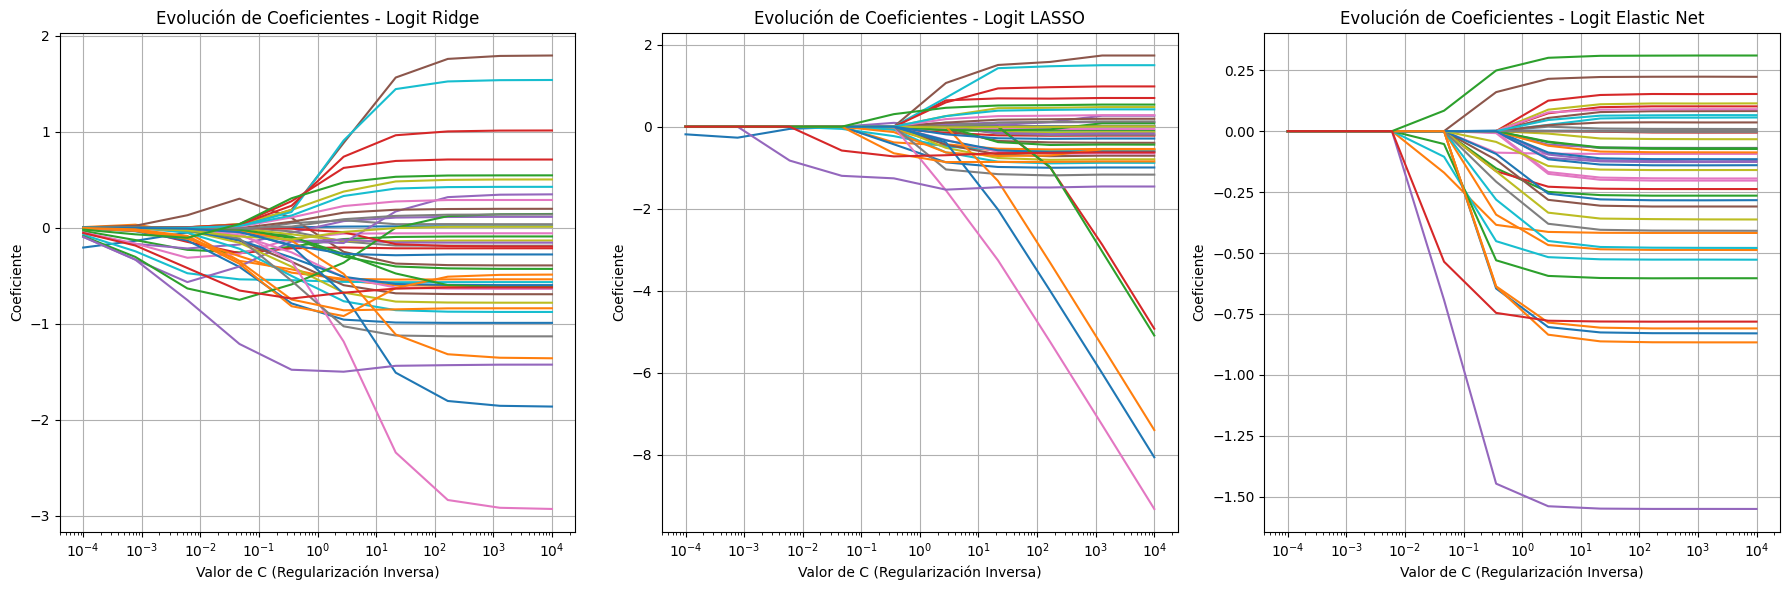

In [29]:

# Ajustar un rango de valores de regularización (C) para cada modelo regularizado y ver la evolución de coeficientes
coefs_ridge = []
coefs_lasso = []
coefs_enet = []
Cs = np.logspace(-4, 4, 10)

# Ajustar Ridge, Lasso y Elastic Net con un rango de penalizaciones y guardar coeficientes
for C in Cs:
    # Ridge
    ridge_model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
    ridge_model.fit(X_train_socio, y_train_dengue)
    coefs_ridge.append(ridge_model.coef_[0])

    # Lasso
    lasso_model = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000)
    lasso_model.fit(X_train_socio, y_train_dengue)
    coefs_lasso.append(lasso_model.coef_[0])

    # Elastic Net (usando la razón l1_ratio=0.5 para equilibrar l1 y l2)
    enet_model = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=C, solver='saga', max_iter=1000)
    enet_model.fit(X_train_socio, y_train_dengue)
    coefs_enet.append(enet_model.coef_[0])

# Convertir listas de coeficientes a arreglos para facilidad de graficación
coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)
coefs_enet = np.array(coefs_enet)

# Graficar la evolución de los coeficientes para cada modelo regularizado
plt.figure(figsize=(18, 6))

# Ridge
plt.subplot(1, 3, 1)
plt.plot(Cs, coefs_ridge)
plt.xscale('log')
plt.xlabel('Valor de C (Regularización Inversa)')
plt.ylabel('Coeficiente')
plt.title('Evolución de Coeficientes - Logit Ridge')
plt.grid(True)

# LASSO
plt.subplot(1, 3, 2)
plt.plot(Cs, coefs_lasso)
plt.xscale('log')
plt.xlabel('Valor de C (Regularización Inversa)')
plt.ylabel('Coeficiente')
plt.title('Evolución de Coeficientes - Logit LASSO')
plt.grid(True)

# Elastic Net
plt.subplot(1, 3, 3)
plt.plot(Cs, coefs_enet)
plt.xscale('log')
plt.xlabel('Valor de C (Regularización Inversa)')
plt.ylabel('Coeficiente')
plt.title('Evolución de Coeficientes - Logit Elastic Net')
plt.grid(True)

plt.tight_layout()
plt.show()


In [32]:
# Crear un DataFrame para almacenar los coeficientes
coef_df = pd.DataFrame()

for model_name, pipeline in pipelines.items():
    # Acceder al modelo final dentro del pipeline
    if model_name == 'Logit':
        model = pipeline.named_steps['logit']
    elif model_name == 'Logit Ridge':
        model = pipeline.named_steps['ridge']
    elif model_name == 'Logit LASSO':
        model = pipeline.named_steps['lasso']
    elif model_name == 'Logit Enet':
        model = pipeline.named_steps['enet']

    # Extraer los coeficientes y el nombre de las variables
    coef = model.coef_[0]
    coef_df[model_name] = coef

# Asignar nombres de las variables al índice
coef_df.index = X_socio_encoded.columns

# Mostrar los coeficientes
coef_df

,Logit,Logit Ridge,Logit LASSO,Logit Enet
edad_,0.235604,0.000386,0.0,0.0
Grupos edad_Adultez,-0.272400,-0.001769,0.0,0.0
Grupos edad_Infancia,-0.028950,0.000003,0.0,0.0
Grupos edad_Juventud,-0.073232,-0.000262,0.0,0.0
Grupos edad_Primera infancia,0.027432,0.000655,0.0,0.0
Grupos edad_Vejez,-0.086090,0.001498,0.0,0.0
sexo__M,-0.027712,-0.000319,0.0,0.0
area__2,-0.012402,0.001093,0.0,0.0
area__3,-0.009208,0.001275,0.0,0.0
area__Cabecera Municipal,-0.212612,-0.001440,0.0,0.0


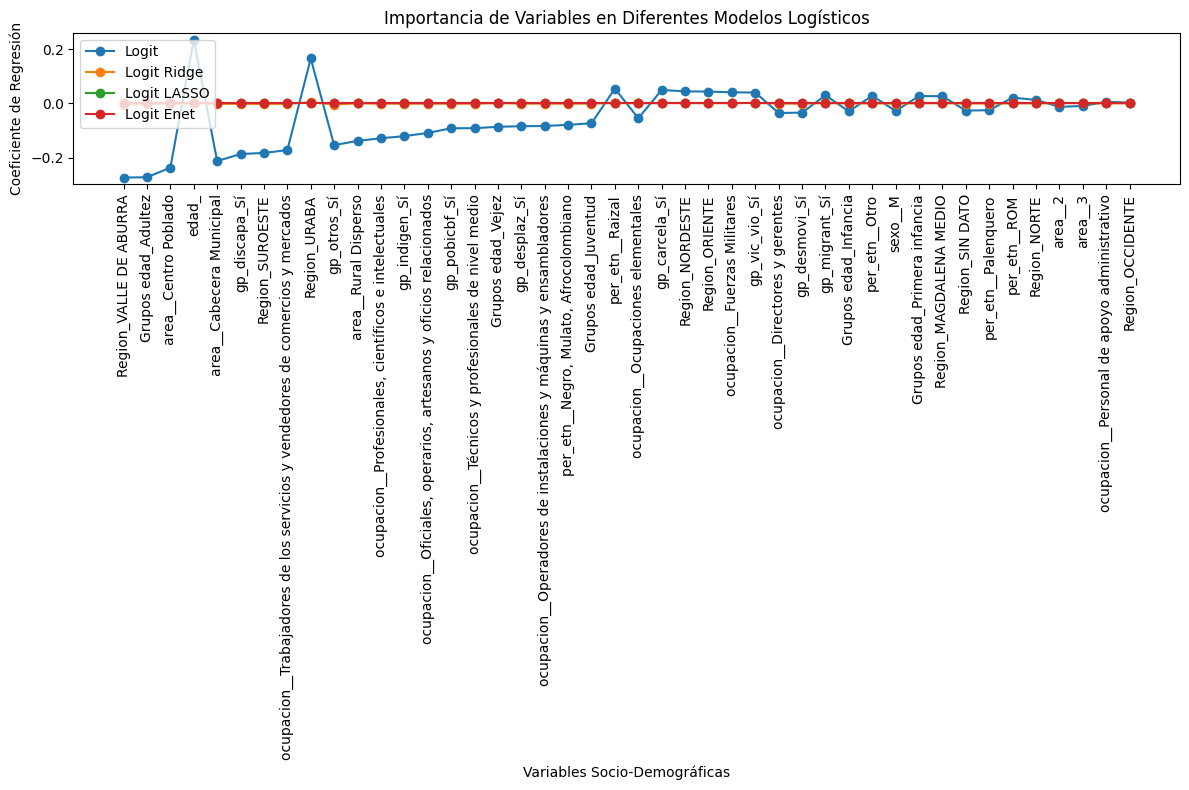

In [33]:
import matplotlib.pyplot as plt

# Seleccionar el modelo base para comparación
base_model = 'Logit'

# Ordenar las variables por la magnitud de sus coeficientes en el modelo base
sorted_coef = coef_df[base_model].abs().sort_values(ascending=False).index

# Reordenar el DataFrame según la variable más relevante
coef_df = coef_df.loc[sorted_coef]

# Plot para cada modelo
plt.figure(figsize=(12, 8))
for model_name in pipelines.keys():
    plt.plot(coef_df.index, coef_df[model_name], label=model_name, marker='o')

plt.xticks(rotation=90)
plt.xlabel('Variables Socio-Demográficas')
plt.ylabel('Coeficiente de Regresión')
plt.title('Importancia de Variables en Diferentes Modelos Logísticos')
plt.legend()
plt.tight_layout()
plt.show()